In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
##https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict.csv
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Dropping Irrelevant Column:-

In [8]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
X = df.drop(['Chance of Admit'],axis=1)
y = df["Chance of Admit"]

# Splitting:-

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Data Scalling:-

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# All Model Library Import:-

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Modal Train:-

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svr = SVR()
svr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test Data:-

In [18]:
y_lr = lr.predict(X_test)
y_svr = svr.predict(X_test)
y_rf = rf.predict(X_test)
y_gbr = gbr.predict(X_test)

# Evaluting Metrics the Algorithm:- 

In [19]:
from sklearn import metrics

In [20]:
score_lr = metrics.r2_score(y_test,y_lr)
score_svr = metrics.r2_score(y_test,y_svr)
score_rf = metrics.r2_score(y_test,y_rf)
score_gbr = metrics.r2_score(y_test,y_gbr)

In [21]:
print("LR Score:-",score_lr)
print("SVR Score:-",score_svr)
print("RF Score:-",score_rf)
print("GBR Score:-",score_gbr)

LR Score:- 0.817386788111443
SVR Score:- 0.7491917153213306
RF Score:- 0.803188009886882
GBR Score:- 0.799795508361496


In [22]:
score_df = pd.DataFrame({'Models':['LR Score','SVR Score','RF Score','GBR Score'],
                         'R2_Score':[score_lr,score_svr,score_rf,score_gbr]})

In [23]:
score_df

,Models,R2_Score
0,LR Score,0.817387
1,SVR Score,0.749192
2,RF Score,0.803188
3,GBR Score,0.799796


# Draw Bar Plot Models VS R2_Score

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Models', ylabel='R2_Score'>

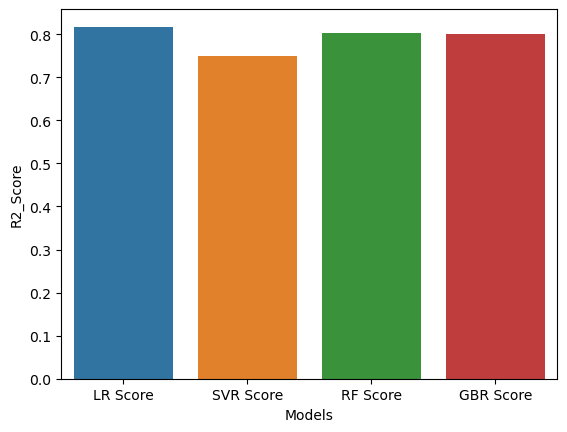

In [25]:
sns.barplot(score_df["Models"],score_df["R2_Score"])

# Chance of Admit col change:- Regression to Classification 

In [26]:
y_train = [1 if value>0.8 else 0 for value in y_train]
y_test = [1 if value>0.8 else 0 for value in y_test]

y_train = np.array(y_train)
y_test = np.array(y_test)

# Import All Classification Models:-

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# LogisticRegression:-

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test,lr_pred)

0.925

# SVC:-

In [29]:
svc = svm.SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.9

# KNeighborsClassifier:-

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test,knn_pred)

0.8875

# RandomForestClassifier:-

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.925

# GradientBoostingClassifier:-

In [32]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
accuracy_score(y_test,gbc_pred)

0.9625

In [33]:
classification_score_df = pd.DataFrame(
{
    'Models':['LR','SVC','KNN','RF','GBR'],
    'ACC_Score':[accuracy_score(y_test,lr_pred),accuracy_score(y_test,svc_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,rf_pred),accuracy_score(y_test,gbc_pred)]
})

In [34]:
classification_score_df

,Models,ACC_Score
0,LR,0.9250
1,SVC,0.9000
2,KNN,0.8875
3,RF,0.9250
4,GBR,0.9625


<AxesSubplot:xlabel='Models', ylabel='ACC_Score'>

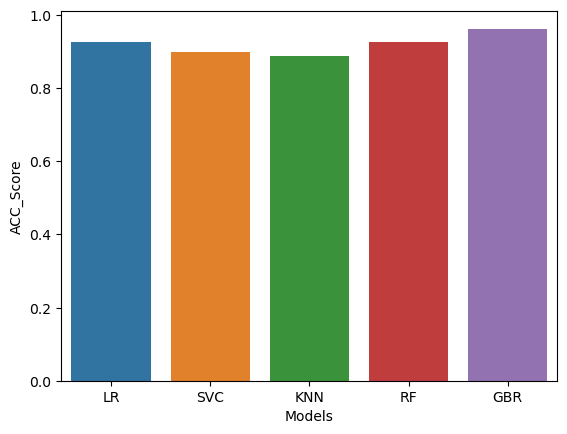

In [35]:
sns.barplot(classification_score_df["Models"],classification_score_df["ACC_Score"])

# Save The Model:-

In [36]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [38]:
X = df.drop('Chance of Admit',axis=1)

In [40]:
y = df['Chance of Admit']

In [41]:
y  = [1 if value>0.8 else 0 for value in y]

In [43]:
y = np.array(y)

In [44]:
y

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [45]:
X = sc.fit_transform(X)

In [46]:
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [47]:
gr = GradientBoostingClassifier()
gr.fit(X,y)

GradientBoostingClassifier()

In [48]:
import joblib

In [49]:
joblib.dump(gr,'admission_model')

['admission_model']

In [50]:
model = joblib.load('admission_model')

In [51]:
model.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))

array([1])

# GUI:-

In [52]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [53]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e6.get())

    model = joblib.load('admission_model')
    result = model.predict(sc.transform([[p1,p2,p3,p4,p5,p6,p7]]))
    
    if result == 1:
        Label(master, text="High Chance of getting admission").grid(row=31)
    else:
        Label(master, text="You may get admission").grid(row=31)
    
master =Tk()
master.title("Graduate Admission Analysis and Prediction")
label = Label(master,text = "Graduate Admission Analysis and Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your GRE Score").grid(row=1)
Label(master,text = "Enter Your TOEFL Score").grid(row=2)
Label(master,text = "Enter University Rating").grid(row=3)
Label(master,text = "Enter SOP").grid(row=4)
Label(master,text = "Enter LOR").grid(row=5)
Label(master,text = "Enter Your CPGA").grid(row=6)
Label(master,text = "Research").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()